# Decision Tree Worksheet

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [21]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv (url, names=names)

invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [22]:
decision_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=2).fit(X_train, y_train)

Print accuracy of training and validation data.

In [23]:
print ("Testing accuracy is " + str(metrics.accuracy_score (y_train, decision_tree.predict(X_train))))
print ("Validation accuracy is " + str(metrics.accuracy_score (y_val, decision_tree.predict(X_val))))

Testing accuracy is 0.96
Validation accuracy is 0.746031746031746


Make a model with a low max-depth and higher minimum sample leafs.

In [24]:
decision_tree2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50).fit(X_train, y_train)

Print accuracy of training and validation data.

In [25]:
print ("Testing accuracy is " + str(metrics.accuracy_score (y_train, decision_tree2.predict(X_train))))
print ("Validation accuracy is " + str(metrics.accuracy_score (y_val, decision_tree2.predict(X_val))))

Testing accuracy is 0.772
Validation accuracy is 0.7301587301587301


Explain the accuracy results below. 

(YOUR ANSWER HERE)

## Metrics

Plot the ROC curve and print the AUC of the second model.

0.7429347826086956


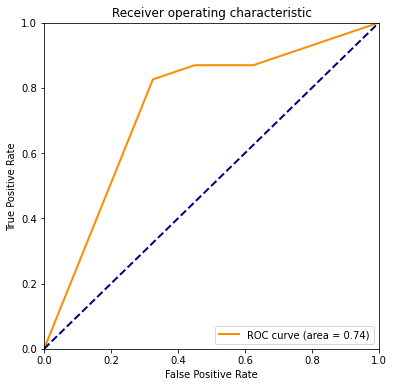

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, decision_tree2.predict_proba(X_val)[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

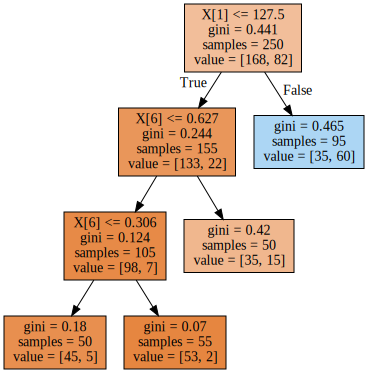

In [27]:
dot_data = tree.export_graphviz(decision_tree2, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

(YOUR ANSWER HERE)

Question 2: What is the root feature? Does it make sense as the root feature?

(YOUR ANSWER HERE)

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

(YOUR ANSWER HERE)

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE

# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE

How did the accuracy compare to the decision tree's accuracy?

(YOUR ANSWER HERE)

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE

Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

In [ ]:
## YOUR CODE HERE

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

In [ ]:
## YOUR CODE HERE